In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 244]

In [3]:
#Give dataset path
train_path = r'C:\Users\CDKVF7A\OneDrive - Deere & Co\Personal_projects\Skin Cancer Classification using VGG 16\archive\train'
test_path = r'C:\Users\CDKVF7A\OneDrive - Deere & Co\Personal_projects\Skin Cancer Classification using VGG 16\archive\test'

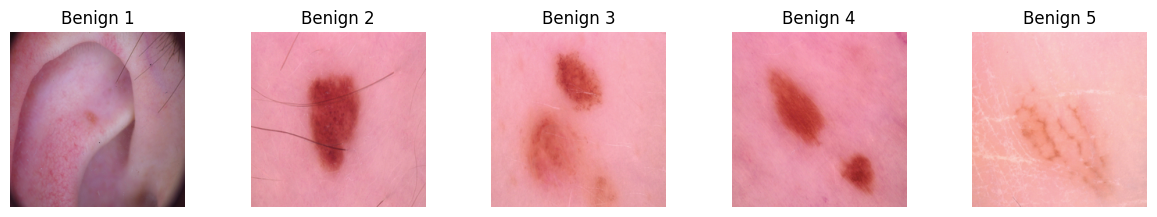

In [4]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# List images in benign and malignant subfolders
benign_images_train = os.listdir(os.path.join(train_path, 'benign')) 
malignant_images_train = os.listdir(os.path.join(train_path, 'malignant')) 

# Randomly select 5 images from each category
selected_benign = random.sample(benign_images_train, 5)
selected_malignant = random.sample(malignant_images_train, 5)

# Function to load and display images
def display_images(image_list, title):
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_list):
        # Determine if the image is in train or test path
        if img_name in os.listdir(os.path.join(train_path, 'benign')) or img_name in os.listdir(os.path.join(train_path, 'malignant')):
            folder = train_path
        else:
            folder = test_path
        
        # Determine if the image is benign or malignant
        if img_name in benign_images_train:
            category = 'benign'
        else:
            category = 'malignant'
        
        img_path = os.path.join(folder, category, img_name)
        img = Image.open(img_path)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(f'{title} {i + 1}')
        plt.axis('off')
    plt.show()

# Display benign images
display_images(selected_benign, 'Benign')


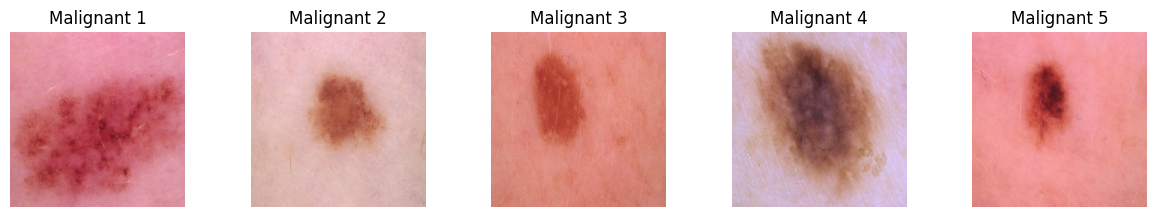

In [5]:
# Display malignant images
display_images(selected_malignant, 'Malignant')

In [6]:
# List images in benign and malignant subfolders
print("No. of Train images:",len(benign_images_train)+len(malignant_images_train))
print("1. Benign : ",len(benign_images_train))
print("2. Malignant : ",len(malignant_images_train))

No. of Train images: 2637
1. Benign :  1440
2. Malignant :  1197


In [7]:
# List images in benign and malignant subfolders
benign_images_test = os.listdir(os.path.join(test_path, 'benign')) 
malignant_images_test = os.listdir(os.path.join(test_path, 'malignant')) 
print("No. of Test images:",len(benign_images_test)+len(malignant_images_test))
print("1. Benign : ",len(benign_images_test))
print("2. Malignant : ",len(malignant_images_test))

No. of Test images: 660
1. Benign :  360
2. Malignant :  300


In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
vgg.input

<KerasTensor shape=(None, 224, 244, 3), dtype=float32, sparse=None, name=keras_tensor>

In [10]:
# Freeze layers
for layer in vgg.layers:
  layer.trainable = False

In [11]:
folders = glob(r'C:\Users\CDKVF7A\OneDrive - Deere & Co\Personal_projects\Skin Cancer Classification using VGG 16\archive\train\*')
print(len(folders))

2


In [12]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 244, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 122, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
from keras import optimizers

adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 244),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 244),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [18]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='vgg16_model.keras', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=5,
  validation_steps=32,
  callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50


c:\Users\CDKVF7A\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.91878, saving model to vgg16_model.keras


c:\Users\CDKVF7A\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


5/5 - 44s - 9s/step - accuracy: 0.5750 - loss: 2.9415 - val_accuracy: 0.7379 - val_loss: 1.9188
Epoch 2/50

Epoch 2: val_loss improved from 1.91878 to 1.85218, saving model to vgg16_model.keras
5/5 - 42s - 8s/step - accuracy: 0.7688 - loss: 1.9953 - val_accuracy: 0.7894 - val_loss: 1.8522
Epoch 3/50

Epoch 3: val_loss did not improve from 1.85218
5/5 - 43s - 9s/step - accuracy: 0.7375 - loss: 2.3188 - val_accuracy: 0.7470 - val_loss: 2.1667
Epoch 4/50

Epoch 4: val_loss did not improve from 1.85218
5/5 - 43s - 9s/step - accuracy: 0.7812 - loss: 1.5086 - val_accuracy: 0.7621 - val_loss: 2.5684
Epoch 5/50

Epoch 5: val_loss improved from 1.85218 to 1.61893, saving model to vgg16_model.keras
5/5 - 43s - 9s/step - accuracy: 0.8125 - loss: 2.7418 - val_accuracy: 0.8091 - val_loss: 1.6189
Epoch 6/50

Epoch 6: val_loss improved from 1.61893 to 1.52183, saving model to vgg16_model.keras
5/5 - 43s - 9s/step - accuracy: 0.7500 - loss: 1.8193 - val_accuracy: 0.8136 - val_loss: 1.5218
Epoch 7/50



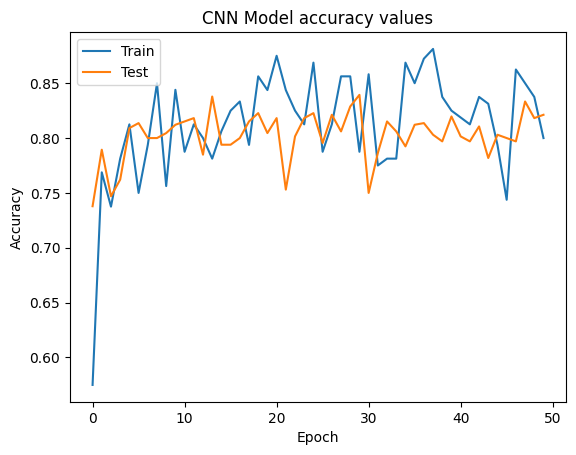

In [19]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, verbose=2)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

21/21 - 35s - 2s/step - accuracy: 0.8258 - loss: 1.7397
Test Accuracy: 82.58%
